In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

## Lotka-Volterra-modellen for oscillerende kjemiske reaksjoner

Dette er den tidligste foreslåtte forklaringen på hvorfor en reaksjon kan oscillerere. I 1920 foreslo Lotka følgende reaksjonsmekanisme (med tilhørende hastighetsligninger). Hvert reaksjonstrinn refererer til den **molekylære** mekanismen der reaktantmolekylene kombineres for å produsere mellomprodukter eller sluttprodukter. For eksempel kombinerer i trinn 1 et molekyl av art A seg med et molekyl av art X for å danne to molekyler av art X. Dette trinnet reduserer antallet molekyler av A (og øker antallet av X) med en hastighet som er proporsjonal med produktet av konsentrasjonene av A og X. Bidrag fra de molekylære reaksjonstrinnene til de differensielle hastighetslovene:  

1. $ A + X \rightarrow 2X $, med reaksjonshastighet $ k_1 $  
2. $ X + Y \rightarrow 2Y $, med reaksjonshastighet $ k_2 $  
3. $ Y \rightarrow B $, med reaksjonshastighet $ k_3 $  

De effektive hastighetslovene for reaktanten A, produktet B, og mellomproduktene X og Y finnes ved å summere bidragene fra hvert trinn:  

$$
\frac{d[A]}{dt} = -k_1 [A][X]
$$  
$$
\frac{d[X]}{dt} = k_1 [A][X] - k_2 [X][Y]
$$  
$$
\frac{d[Y]}{dt} = k_2 [X][Y] - k_3 [Y]
$$  
$$
\frac{d[B]}{dt} = k_3 [Y]
$$  

**Instruksjoner:**  
Anta at konsentrasjonen av reaktanten A faktisk holdes konstant (den tilføres systemet med en hastighet som tilsvarer fjerningen ved reaksjonen). Merk også at  

$$
\frac{d(A+X+Y+B)}{dt} = 0
$$  

Dette betyr at summen $ A + X + Y + B $ alltid er konstant. Spesielt gjelder at $ A + B + X + Y = A + X_0 + Y_0 $, forutsatt at det ikke er noe produkt B til stede i starten. Dette forteller oss at vi ikke trenger å løse ODE-en for $ B $, fordi $ B = X_0 - X + Y_0 - Y $ hvis vi kjenner $ X(t) $ og $ Y(t) $. Dermed kan systemet reduseres til to ODE-er for $ X $ og $ Y $ alene. Skriv opp systemet av differensialligninger i $X$ og $Y$ og løs for disse to med randbetingelsene $A = 1$, $X_0 = 1$, $Y_0 = 1$, $k_1 = 0.3$, $k_2 = 0.2$ og $k_3 = 0.3$.

In [ ]:
# Denne funksjonen passer bedre med brukergrensesnittet til solve_ivp
def lotkaVoltera(t, z, A, k1, k2, k3):
    x, y = z
    return [k1 * A * x - k2 * x * y, k2 * x * y - k3 * y]

In [ ]:
# Setter inn valg av parametre og startverdier

x0 = 1.2
y0 = 1

A = 1

k1 = 0.3
k2 = 0.2
k3 = 0.3

t0 = 0
tn = 50

n = 1000

t = np.linspace(0, tn, n)

In [ ]:
sol = solve_ivp(lotkaVoltera, [t0, tn], [x0, y0], args=(A, k1, k2, k3), t_eval=t, method='DOP853')

For standard nøyaktighet gjør dette:

```python
sol = solve_ivp(lotkaVoltera, [t0, tn], [x0, y0], args=(A, k1, k2, k3), t_eval=t, method='RK45')
```

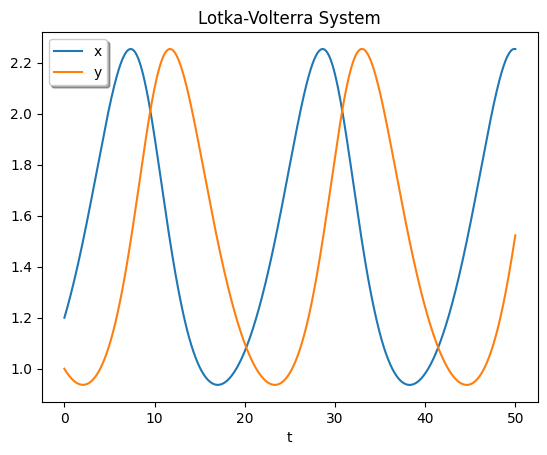

In [ ]:
z = sol.y

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

## Oppgave

Bruk Eulers metode til å løse Lotka Volterra systemet over. (Den kan importeres slik:
```python
from python_linear_algebra.diffligninger import eulers_metode
```

```python
def lotka_voltera_funksjoner(A, k1, k2, k3):    
    def f(t, x, y):
        return k1 * A * x - k2 * x * y
    
    def g(t, x, y):
        return k2 * x * y - k3 * y
        
    return f, g

f, g = lotka_voltera_funksjoner(A, k1, k2, k3)

t, x, y = eulers_metode(f, g, t0, tn, x0, y0, n=100)
```

Hva kan du si om forskjellen til de to løsningene?

Vi kan også plotte fasediagrammer:

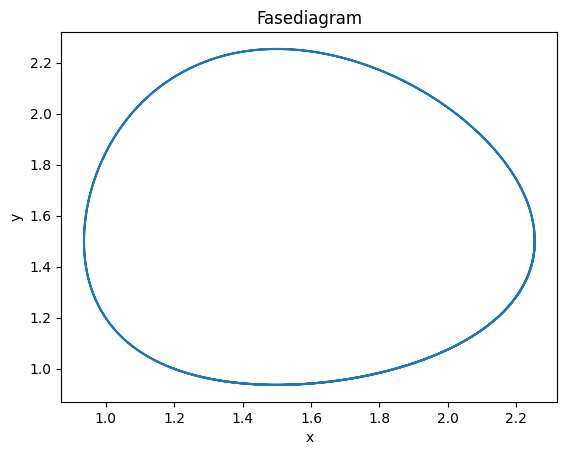

In [ ]:
plt.plot(z[0], z[1])
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='upper left')
plt.title(r"Fasediagram");

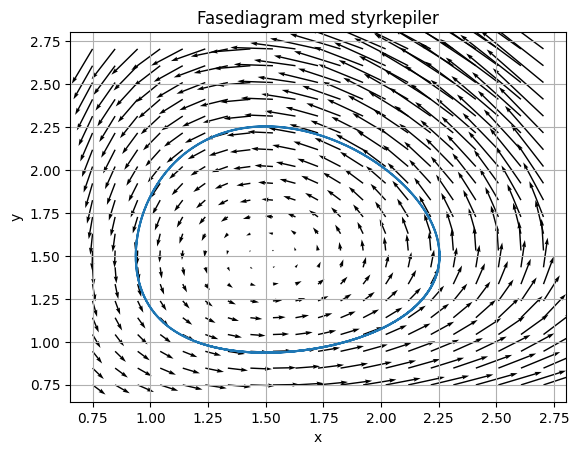

In [ ]:
n_grid = 20


# Definerer x- og y-verdiene

x = np.linspace(0.8*np.min(z[0]), 1.2*np.max(z[0]), num=n_grid+1)
y = np.linspace(0.8*np.min(z[1]), 1.2*np.max(z[1]), num=n_grid+1)

# Finner retning av piler
X, Y = np.meshgrid(x, y)
dX, dY = lotkaVoltera(0, (X, Y), A, k1, k2, k3)
#dX = np.sign(dX)*np.abs(dX)**0.3
#dY = np.sign(dY)*np.abs(dY)**0.3

plt.quiver(X, Y, dX, dY, scale=2, scale_units='xy', color='black', angles='xy')
#plt.plot(t, x_2(t), label='x(t) = 2e^t')
#plt.ylim((0, 5))
plt.grid()
# Lager et firkantet gitter av de oppgitte x- og y-verdiene
X, Y = np.meshgrid(x, y)
plt.plot(z[0], z[1])
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='upper left')
plt.title(r"Fasediagram med styrkepiler");

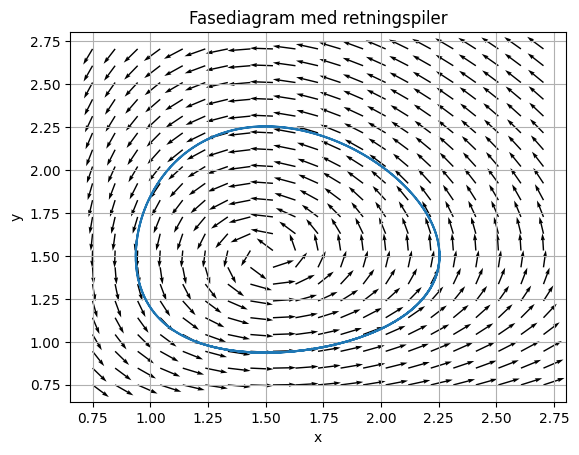

In [ ]:
n_grid = 20


# Definerer x- og y-verdiene

x = np.linspace(0.8*np.min(z[0]), 1.2*np.max(z[0]), num=n_grid+1)
y = np.linspace(0.8*np.min(z[1]), 1.2*np.max(z[1]), num=n_grid+1)

# Finner retning av piler
X, Y = np.meshgrid(x, y)
dX, dY = lotkaVoltera(0, (X, Y), A, k1, k2, k3)
r = (dX**2 + dY**2)**0.5
r[r < 1e-8] = 1
dX = dX / r
dY = dY / r
#dX = np.sign(dX)*np.abs(dX)**0.3
#dY = np.sign(dY)*np.abs(dY)**0.3

plt.quiver(X, Y, dX, dY, scale=10, scale_units='xy', color='black', angles='xy')
#plt.plot(t, x_2(t), label='x(t) = 2e^t')
#plt.ylim((0, 5))
plt.grid()
# Lager et firkantet gitter av de oppgitte x- og y-verdiene
X, Y = np.meshgrid(x, y)
plt.plot(z[0], z[1])
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='upper left')
plt.title(r"Fasediagram med retningspiler");

In [ ]:
def plot_arrows_along_curve(x, y, t, num_arrows=10, ax=None):
    if ax is None:
        ax = plt.gca()
    p = []

    for i in range(num_arrows):
        p = int(i/num_arrows*len(t)) # Equally spaced intervals
        yp = y[p]
        xp = x[p]
        dyp = y[p+1]-y[p]
        dxp = x[p+1]-x[p]
        ax.arrow(xp, yp, dxp, dyp ,shape='full', length_includes_head=True, head_width=0.05)
    return ax

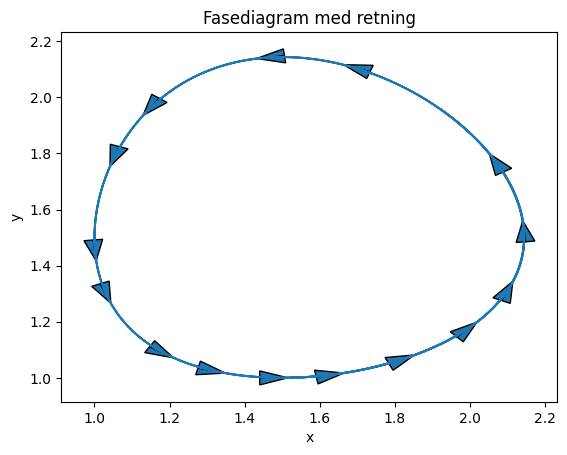

In [ ]:
plt.plot(z[0], z[1])
plot_arrows_along_curve(z[0], z[1], t, num_arrows=15, ax=None)
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='upper left')
plt.title(r"Fasediagram med retning");

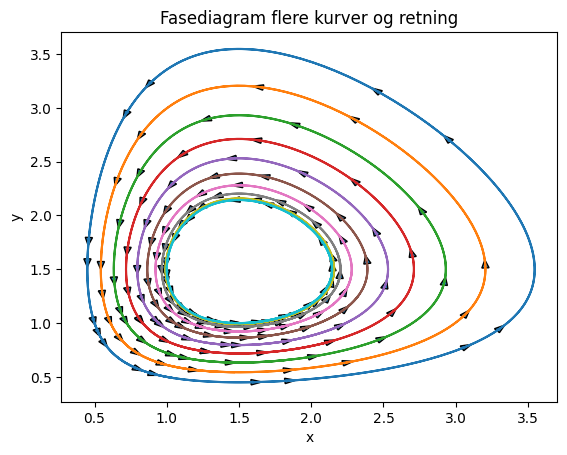

In [ ]:
for x0 in np.linspace(0.5, 1.5, 10):
    sol = solve_ivp(lotkaVoltera, [t0, tn], [x0, y0], args=(A, k1, k2, k3), t_eval=t, method='DOP853')
    z = sol.y
    plt.plot(z[0], z[1])
    plot_arrows_along_curve(z[0], z[1], t, num_arrows=15, ax=None)
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='upper left')
plt.title(r"Fasediagram flere kurver og retning");

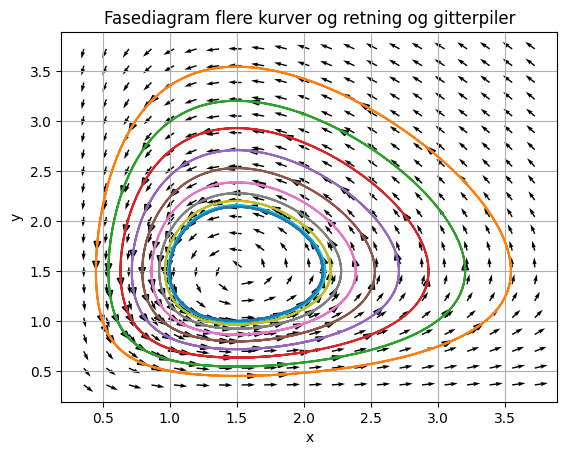

In [ ]:
# Definerer x- og y-verdiene

minx = np.inf
miny = np.inf
maxx = -np.inf
maxy = -np.inf

plt.grid()
# Lager et firkantet gitter av de oppgitte x- og y-verdiene
X, Y = np.meshgrid(x, y)
plt.plot(z[0], z[1])
for x0 in np.linspace(0.5, 1.5, 10):
    sol = solve_ivp(lotkaVoltera, [t0, tn], [x0, y0], args=(A, k1, k2, k3), t_eval=t, method='DOP853')
    z = sol.y
    minx = min(minx, np.min(z[0]))
    maxx = max(maxx, np.max(z[0]))
    miny = min(miny, np.min(z[1]))
    maxy = max(maxy, np.max(z[1]))
    plt.plot(z[0], z[1])
    plot_arrows_along_curve(z[0], z[1], t, num_arrows=15, ax=None)

x = np.linspace(0.8 * minx, 1.05*maxx, num=n_grid+1)
y = np.linspace(0.8 * miny, 1.05*maxy, num=n_grid+1)
# Finner retning av piler
X, Y = np.meshgrid(x, y)
dX, dY = lotkaVoltera(0, (X, Y), A, k1, k2, k3)
r = (dX**2 + dY**2)**0.5
r[r < 1e-8] = 1
dX = dX / r
dY = dY / r

plt.quiver(X, Y, dX, dY, scale=10, scale_units='xy', color='black', angles='xy')
#plt.plot(t, x_2(t), label='x(t) = 2e^t')
#plt.ylim((0, 5))
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='upper left')
plt.title(r"Fasediagram flere kurver og retning og gitterpiler");

In [ ]:
np.max(Y)

np.float64(3.724943983734439)